In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plot_rides import plot_rides_by_day, plot_rides_by_hour, plot_rides_by_month, plot_rides_by_day_for_specific_month
from extract_data import extract_hour_day_month

In [31]:
data = pd.read_csv('../data/other-American_B01362.csv')

In [32]:
data

,DATE,TIME,PICK UP ADDRESS,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX",NaN,NaN,NaN
1,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX",NaN,NaN,NaN
2,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX",NaN,NaN,NaN
3,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX",NaN,NaN,NaN
4,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX",NaN,NaN,NaN
...,...,...,...,...,...,...
91707,9/30/2014,11:47:00 PM,"593 Oak Ter Mott Haven, BX",NaN,NaN,NaN
91708,9/30/2014,11:48:00 PM,"645 Westchester Ave South Bronx, BX",NaN,NaN,NaN
91709,9/30/2014,11:51:00 PM,"625 Tinton Ave South Bronx, BX",NaN,NaN,NaN
91710,9/30/2014,11:54:00 PM,"350 Saint Anns Ave Mott Haven, BX",NaN,NaN,NaN


In [33]:
data = data.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)

In [34]:
data

,DATE,TIME,PICK UP ADDRESS
0,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX"
1,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX"
2,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX"
3,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX"
4,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX"
...,...,...,...
91707,9/30/2014,11:47:00 PM,"593 Oak Ter Mott Haven, BX"
91708,9/30/2014,11:48:00 PM,"645 Westchester Ave South Bronx, BX"
91709,9/30/2014,11:51:00 PM,"625 Tinton Ave South Bronx, BX"
91710,9/30/2014,11:54:00 PM,"350 Saint Anns Ave Mott Haven, BX"


In [35]:
data['DATETIME'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'], format='%m/%d/%Y %I:%M:%S %p')
data.rename(columns={'DATETIME': 'Date/Time'}, inplace=True)
data = data.drop(['DATE', 'TIME'], axis = 1)

extract_hour_day_month(data)     


In [36]:
data

,PICK UP ADDRESS,Date/Time,Hour,Month,Day,DayOfWeek
0,"874 E 139th St Mott Haven, BX",2014-07-01 00:00:00,0,July,1,Tuesday
1,"628 E 141st St Mott Haven, BX",2014-07-01 00:01:00,0,July,1,Tuesday
2,"601 E 156th St South Bronx, BX",2014-07-01 00:01:00,0,July,1,Tuesday
3,"708 E 138th St Mott Haven, BX",2014-07-01 00:01:00,0,July,1,Tuesday
4,"700 E 140th St Mott Haven, BX",2014-07-01 00:02:00,0,July,1,Tuesday
...,...,...,...,...,...,...
91707,"593 Oak Ter Mott Haven, BX",2014-09-30 23:47:00,23,September,30,Tuesday
91708,"645 Westchester Ave South Bronx, BX",2014-09-30 23:48:00,23,September,30,Tuesday
91709,"625 Tinton Ave South Bronx, BX",2014-09-30 23:51:00,23,September,30,Tuesday
91710,"350 Saint Anns Ave Mott Haven, BX",2014-09-30 23:54:00,23,September,30,Tuesday


In [37]:
data['DayOfWeek'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [38]:
data['Month'].unique()

array(['July', 'August', 'September'], dtype=object)

In [39]:
month_order = ['July', 'August', 'September']

Month
July         30348
August       31483
September    29881
Name: count, dtype: int64


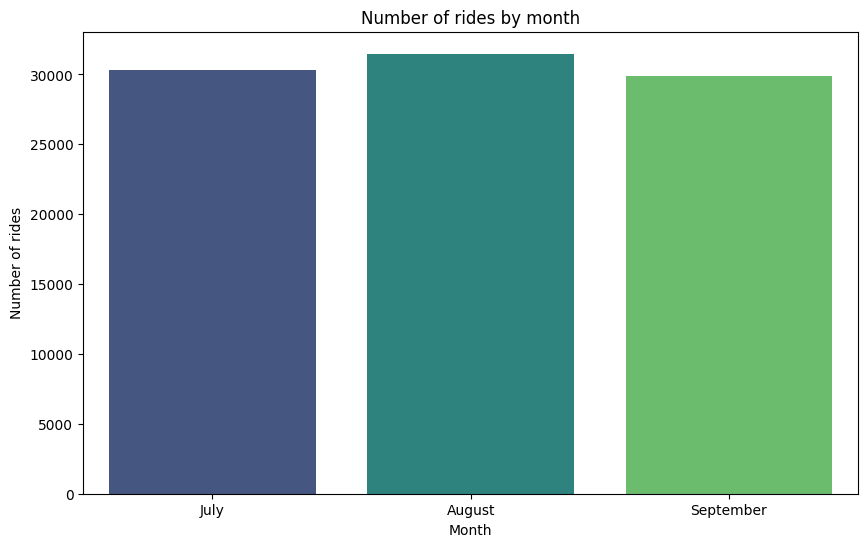

In [40]:
plot_rides_by_month(data, month_order)

All three months have approximately the same amount of data, which is a good indicator for data analysis.

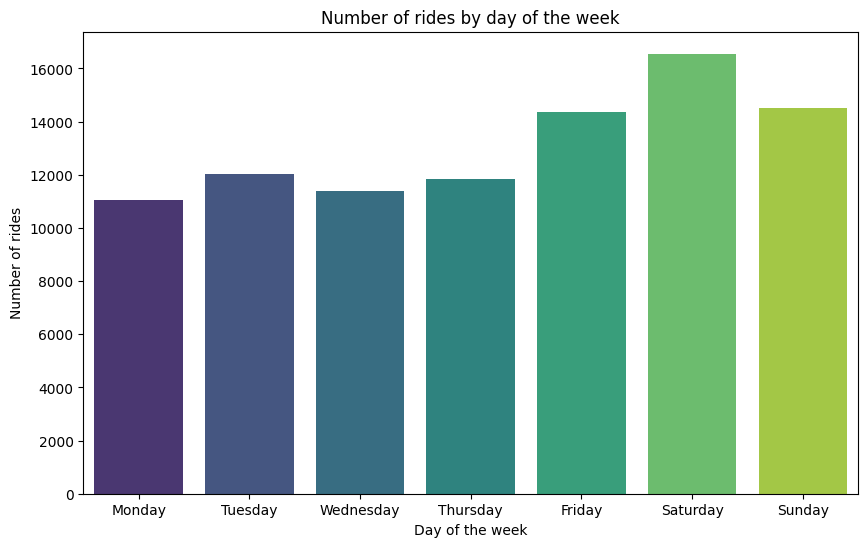

In [41]:
plot_rides_by_day(data)

The number of rides during weekdays is quite consistent, while during the weekend we notice an increase in demand that can be related to social activities, night outs, etc.

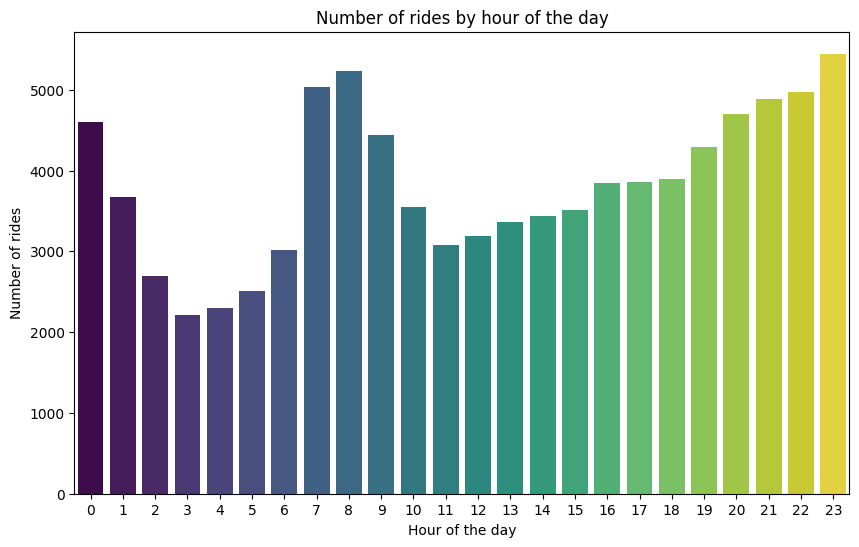

In [42]:
plot_rides_by_hour(data)

Looking at this histogram, we notice that the peaks occur mostly in the early morning and late evening hours. This means that people most often choose this type of transport, probably for going to (and from) work and returning from evening activities.

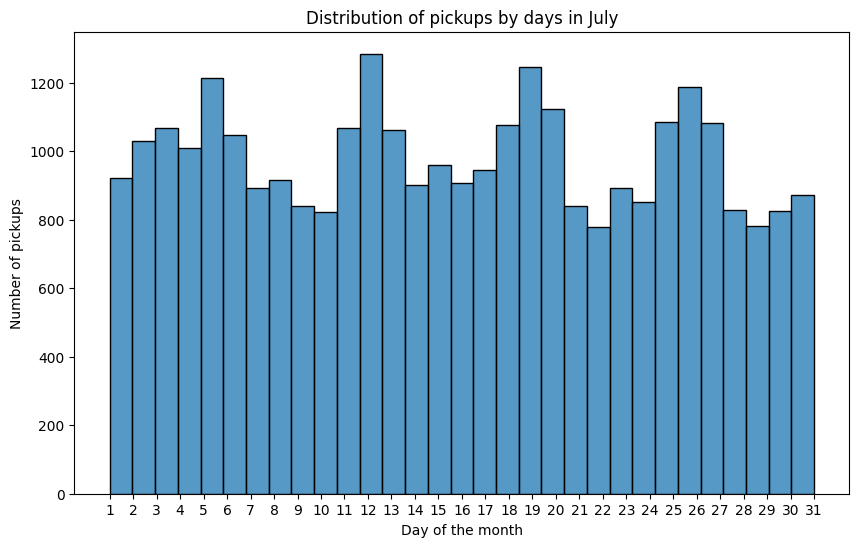

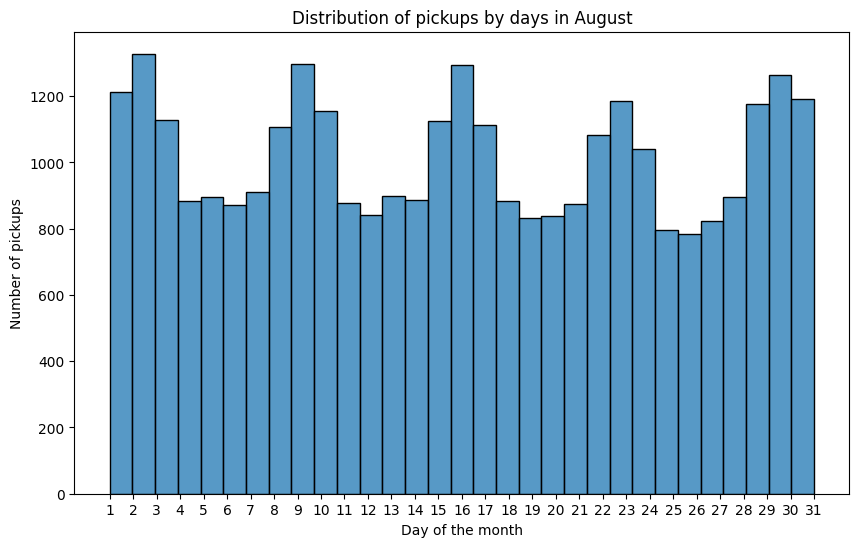

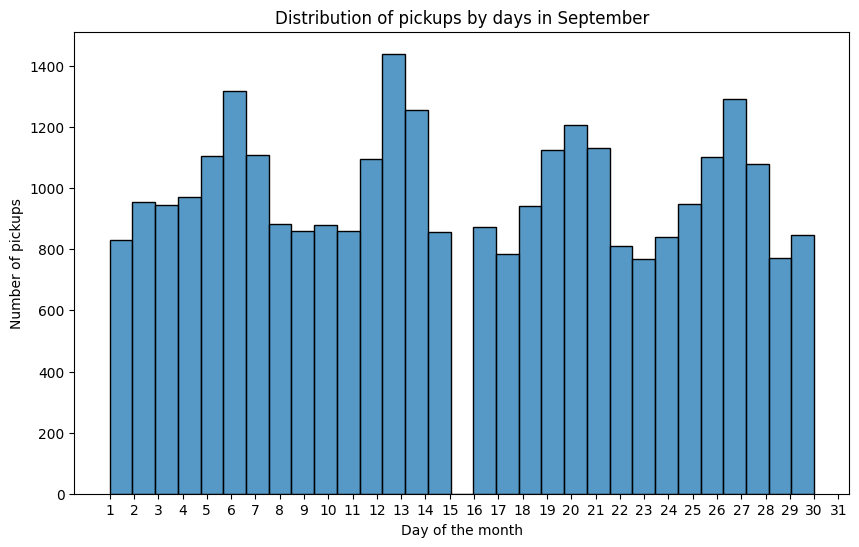

In [43]:
unique_months = data['Month'].unique()

for i, month in enumerate(unique_months):
    month_data = data[data['Month'] == month]
    
    plot_rides_by_day_for_specific_month(data, month)

### July
There are notable peaks in pickups on the 5th, 12th, 19th, and 26th of July. These dates correspond to weekends, which typically see higher transportation demand due to social activities and events.  
While the peaks are clear, the overall distribution of pickups throughout the month is fairly consistent, with minor fluctuations. This suggests that there were no major events on most days that drastically increased demand.

### August
The highest peaks are on the 2nd, 9th, 16th, 23rd, and 30th of August. Like in July, these peaks align with weekends. The highest peak on the 9th could be related to specific events such as the Summer Streets or other festivals that took place in NYC during this time.  
Similar to July, August shows a consistent pattern of increased demand during weekends, indicating a strong correlation between weekend activities and transportation needs.

### September
September shows significant peaks on the 6th, 13th, 20th, and 27th. These peaks align with weekends, suggesting that weekend activities continue to drive higher transportation demand.  
The highest peak on the 13th could be related to the ongoing events like the US Open Tennis Championship or other major city events.  
There's a noticeable decrease in activity around mid-month, which may be due to fewer major events occurring or a shift back to typical weekday routines with less social engagement.